# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

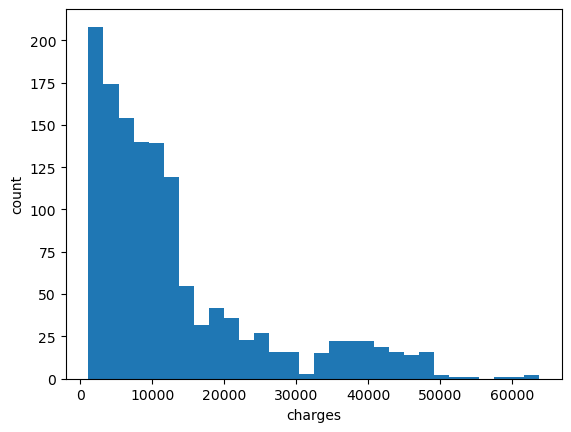

In [4]:
plt.hist(medical['charges'],bins='auto')
plt.xlabel('charges')
plt.ylabel('count');

In [6]:
medical.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
sex,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
smoker,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
region,1338.0,1.515695,1.104885,0.0000,1.00000,2.000,2.000000,3.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801
insuranceclaim,1338.0,0.585202,0.492871,0.0000,0.00000,1.000,1.000000,1.00000


This is a right- skewed distribution.

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

We can define the problem statement such as-

Null Hypothesis : Average Charge < 12,000

Alternative Hypothesis :Average Charge > = 12,000.

Considering the data is a random sample, our population parameters are unknown. Hence, we would consider to perform a t-test check the claim.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

The appropriate confidence interval for this test would be one sided. 

In [5]:
def t_test(sample):
    
    # 100% - 95% = 5%
    alpha = 0.05

    # degree of freedom
    sampleSize = len(sample)
    dof = sampleSize - 1

    # probability percentile function for t
    t_ = t.ppf(1-alpha/2,dof)

    # Unbiased estimate of population variance i.e sample standard deviation
    sampleStd = np.std(sample,ddof=1)

    # Standard Error
    SE = sampleStd/np.sqrt(sampleSize)

    # CI with sample std
    MOEt = t_ * SE

    # sample mean
    m = np.mean(sample)

    # print(sampleStd,population_std)

    return t_,sampleStd,SE,MOEt,m

In [6]:
t_,sampleStd,SE,MOEt,m = t_test(medical['charges'])

In [9]:
print('H0 : sample mean <12000,\
      \nH1: sample mean >= 12000,\
      \nalpha=0.05\n')


print(f'Unbiased estimate of population variance = {sampleStd}')
print(f'Satandard Error = {SE}')

# print('\nt-test')
# print(f't value = {(m-population_m) / SE}')
print(f't0 = {t_}')


print(f'\nMargin Of Error with t-test is {round(MOEt,2)}')


print(f'\nConfidence intervals for the mean: (lower,upper) = \n{m-MOEt,m+MOEt}')


print(f'\nIs H0 true? => {m-MOEt < 12000}')

H0 : sample mean <12000,      
H1: sample mean >= 12000,      
alpha=0.05

Unbiased estimate of population variance = 12110.011236693994
Satandard Error = 331.06745431568226
t0 = 1.961739888600845

Margin Of Error with t-test is 649.47

Confidence intervals for the mean: (lower,upper) = 
(12620.954034192644, 13919.890496089869)

Is H0 true? => False


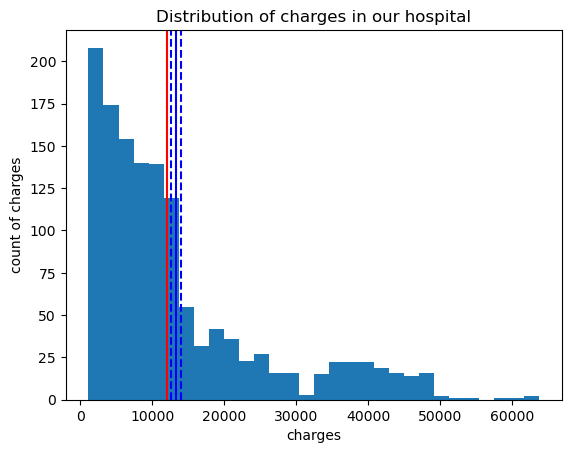

In [11]:
_ = plt.hist(medical['charges'],bins='auto')
_ = plt.xlabel('charges')
_ = plt.ylabel('count of charges')
_ = plt.title('Distribution of charges in our hospital')
_ = plt.axvline(m, color='b')
_ = plt.axvline(m+MOEt, color='b', linestyle='--')
_ = plt.axvline(m-MOEt, color='b', linestyle='--')
_ = plt.axvline(12000, color='r')

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

Let us define the problem as- 

sample average ($\bar x_0$), standard deviation($s_0$) and sample size ($n_0$) of people without insurance

sample average ($\bar x_1$), standard deviation($s_1$) and sample size ($n_1$) of people with insurance.

In this case, the hypothesis definition would be-

Null Hypothesis: $\bar x_0$ = $\bar x_1$

Alternate Hypothesis: $\bar x_0$ != $\bar x_1$.

We are assuming that the variances are different (i.e. unequal) for the groups. So, wo calculate the Marging of Error, we are computing pooled standard deviation as mentioned above. 

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [12]:
medical.insuranceclaim.isna().sum()

0

In [13]:
s0 = medical[medical.insuranceclaim==0]
s1 = medical[medical.insuranceclaim==1]

In [14]:
# The pooled standard deviation of the two groups: sp
sp=np.sqrt(((len(s1.charges)-1)*(np.std(s1.charges,ddof=1)**2) + (len(s0.charges)-1)*(np.std(s0.charges,ddof=1)**2))/(len(s1.charges)+len(s0.charges)-2))
sp

11520.034268775256

In [15]:
# t-test statistic 
t2_=(np.mean(s1.charges) - np.mean(s0.charges))/(sp*np.sqrt((1/len(s1.charges))+(1/len(s0.charges))))
t2_

11.89329903087671

In [16]:
# % of confidence: p
dof=len(s1.charges)+len(s0.charges)-2
pvalue=2*t.cdf(-t2_,dof)
pvalue

4.461230231620972e-31

In [23]:
import scipy.stats as stats
stats.ttest_ind(s1.charges, s0.charges,equal_var=True)

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

No such test for z-test exists.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test